<h2> Analyzing and visualization of korean food in subreddit 

In [21]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [23]:
df_kf_proc = pd.read_csv("korean_food_subreddit_processed.csv")
df_kf_proc['processed_tokens'] = df_kf_proc['processed_tokens'].apply(ast.literal_eval)

#### 1. Frequency Analysis & Bar Charts (r/KoreanFood Data)

In [24]:
stop_words = set(stopwords.words('english'))
custom_stopwords_layer1 = [
    'korea', 'korean', 'seoul', 'visit', 'trip', 'travel', 'tourist', 'food', 'eat', 'restaurant',
    'place', 'market', 'drink', 'recommend', 'suggestion', 'anyone', 'know', 'thanks', 'thank',
    'help', 'advice', 'question', 'please', 'looking', 'wondering', 'like', 'good', 'nice',
    'great', 'amazing', 'delicious', 'best', 'really', 'also', 'get', 'go', 'try', 'went', 'im',
    'ive', 'im', 'one', 'day', 'time', 'people', 'lot', 'would', 'us', 'got', 'much', 'experience',
    'english', 'sure', 'want', 'think', 'things', 'make', 'made', 'recipe', 'cook', 'cooking'
]
custom_stopwords_layer2 = [
    'station', 'hotel', 'street', 'museum', 'myeongdong', 'area', 'park', 'city', 'night', 'busan',
    'village', 'tour', 'bus', 'hour', 'many', 'palace', 'thing', 'map', 'cafe', 'store', 'airport',
    'dinner', 'way', 'hongdae', 'taxi', 'card', 'line', 'itinerary', 'local', 'walk', 'train', 'jeju',
    'island', 'ticket', 'need', 'plan', 'check', 'book', 'look', 'youre', 'first', 'shopping', 'kid',
    'free', 'beach', 'hanok', 'morning', 'option', 'google', 'friend', 'traditional', 'open', 'flight',
    'small', 'temple', 'last', 'bit', 'app', 'tower', 'view', 'dont', 'car', 'stop'
]
custom_stopwords_layer3 = [
    'dish', 'favorite', 'little', 'bowl', 'mom', 'thats', 'meal', 'home', 'ingredient', 'side', 'lunch'
]
stop_words.update(custom_stopwords_layer1)
stop_words.update(custom_stopwords_layer2)
stop_words.update(custom_stopwords_layer3)


custom_stopwords_layer4 = [
    'year', 'lol', 'something', 'part', 'taste', 'different'
]
stop_words.update(custom_stopwords_layer4)
print(f"Total stopwords now (Layer 4 included): {len(stop_words)}")


Total stopwords now (Layer 4 included): 338


In [25]:
def filter_with_new_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [26]:
df_kf_proc['processed_tokens_filtered_v3'] = df_kf_proc['processed_tokens'].apply(filter_with_new_stopwords)

In [29]:
all_kf_tokens_filtered_v3 = [token for sublist in df_kf_proc['processed_tokens_filtered_v3'] for token in sublist]
print(f"Total filtered Reddit tokens: {len(all_kf_tokens_filtered_v3)}")

Total filtered Reddit tokens: 14190


In [30]:
# Frequency Distribution 
fdist_kf_filtered_v3 = FreqDist(all_kf_tokens_filtered_v3)

In [31]:
print("\nTop 30 Most Common Words (r/KoreanFood - V3 Filtered - FINAL):")
top_words_kf_v3 = fdist_kf_filtered_v3.most_common(30)
print(top_words_kf_v3)


Top 30 Most Common Words (r/KoreanFood - V3 Filtered - FINAL):
[('kimchi', 241), ('rice', 185), ('egg', 140), ('sauce', 135), ('spicy', 90), ('noodle', 87), ('chicken', 79), ('onion', 77), ('soup', 76), ('bibimbap', 76), ('green', 65), ('oil', 63), ('sweet', 63), ('pork', 63), ('hot', 60), ('jjigae', 57), ('fresh', 56), ('gochujang', 56), ('kimbap', 54), ('soy', 51), ('garlic', 51), ('sesame', 51), ('meat', 49), ('radish', 48), ('spam', 47), ('yummy', 47), ('next', 46), ('cold', 44), ('beef', 44), ('fish', 44)]


/var/folders/tr/m79b7xln0xs_b0nvgh130p4m0000gn/T/ipykernel_1937/2172744235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_kf_v3_df, palette='viridis') # Back to viridis


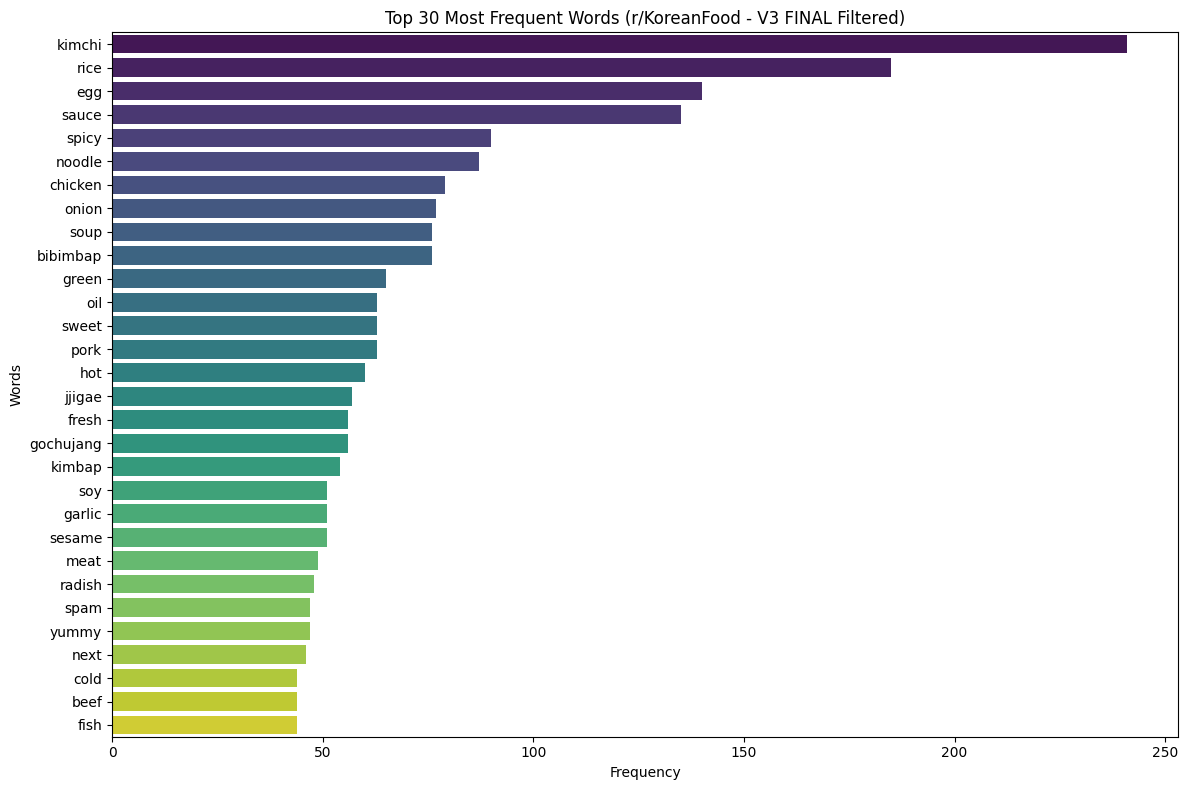

In [32]:
# Plot Top 30 Words in r/Korean Food

top_words_kf_v3_df = pd.DataFrame(top_words_kf_v3, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_words_kf_v3_df, palette='viridis') # Back to viridis
plt.title('Top 30 Most Frequent Words (r/KoreanFood - V3 FINAL Filtered)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

#### 2. Word Cloud Generation (r/KoreanFood Data)

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


Generating FINAL r/KoreanFood Word Cloud (V3)...


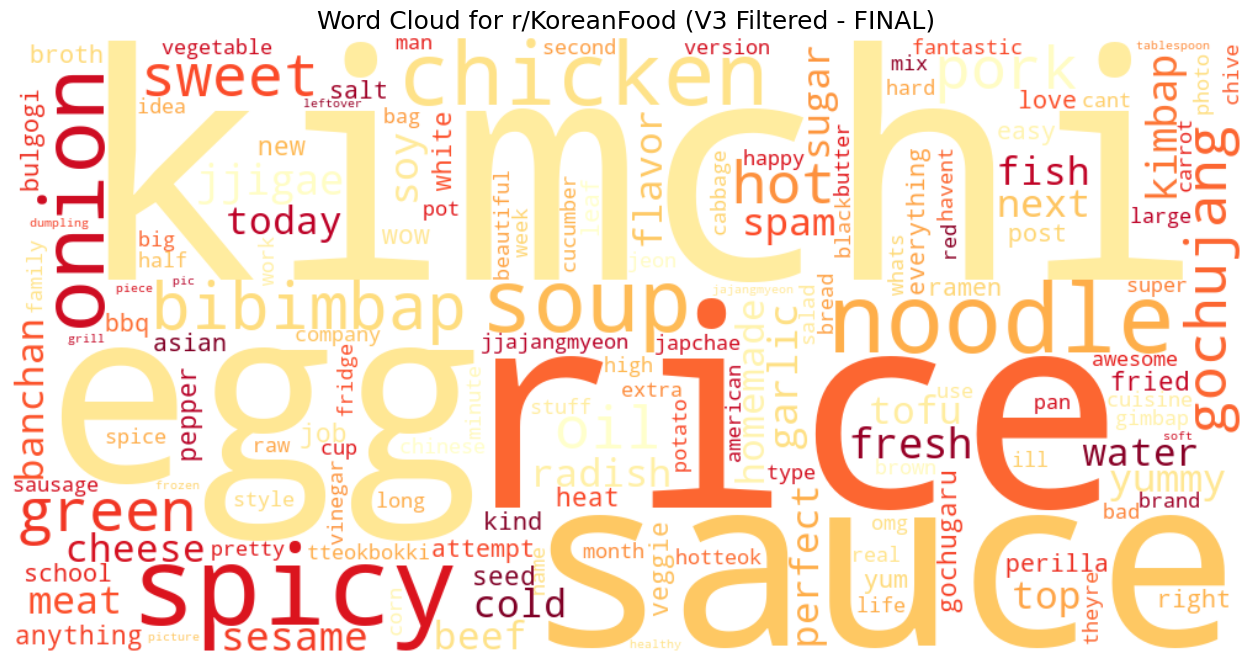

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


if 'all_kf_tokens_filtered_v3' in locals() and all_kf_tokens_filtered_v3:
    text_for_wordcloud_kf_v3 = " ".join(all_kf_tokens_filtered_v3)

    print("\nGenerating FINAL r/KoreanFood Word Cloud (V3)...")
    wordcloud_kf_v3 = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='YlOrRd',     # A 'foodie' looking map!
        max_words=150,
        collocations=False # Turn off collocations for more individual words
    ).generate(text_for_wordcloud_kf_v3)

    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud_kf_v3, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for r/KoreanFood (V3 Filtered - FINAL)", size=18)
    plt.show()
else:
    print("Could not find 'all_kf_tokens_filtered_v3'. Please run the V3 filtering step.")

#### Topic Modeling (LDA - V3 Filtered Data)

In [40]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [41]:
try:
    if 'df_kf_proc' not in locals() or 'processed_tokens_filtered_v3' not in df_kf_proc.columns:
         print("Reloading and re-filtering data...")
         
         print("Assuming df_kf_proc with 'processed_tokens_filtered_v3' exists.")

    token_lists_filtered_v3 = df_kf_proc['processed_tokens_filtered_v3'].tolist()
    token_lists_filtered_v3 = [tokens for tokens in token_lists_filtered_v3 if tokens] 

    if token_lists_filtered_v3:
        print("\nPreparing FINAL Filtered Reddit data for Topic Modeling (LDA)...")
        dictionary_v3 = corpora.Dictionary(token_lists_filtered_v3)
        dictionary_v3.filter_extremes(no_below=5, no_above=0.8)

        corpus_v3 = [dictionary_v3.doc2bow(tokens) for tokens in token_lists_filtered_v3]

        print(f"V3 Dictionary size: {len(dictionary_v3)}")
        print(f"V3 Corpus size: {len(corpus_v3)}")

        print("Building FINAL Reddit LDA Model...")
        NUM_TOPICS_REDDIT = 6 
        lda_model_v3 = gensim.models.LdaModel(
            corpus=corpus_v3,
            id2word=dictionary_v3,
            num_topics=NUM_TOPICS_REDDIT,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )

        print("\nFINAL Reddit LDA Topics Found:")
        topics_v3 = lda_model_v3.print_topics(num_words=10)
        for topic in topics_v3:
            print(topic)

        print("\nPreparing FINAL Reddit LDA Visualization (pyLDAvis)...")
        lda_vis_v3 = gensimvis.prepare(lda_model_v3, corpus_v3, dictionary_v3)
        pyLDAvis.save_html(lda_vis_v3, 'lda_visualization_reddit_food_FINAL.html')
        print("FINAL LDA Visualization saved to 'lda_visualization_reddit_food_FINAL.html'. Open this file in your browser.")
        

    else:
        print("No V3 filtered token lists available for LDA modeling.")

except NameError:
    print("Error: 'df_kf_proc' or 'processed_tokens_filtered_v3' not found. Please ensure the V3 filtering code has been run.")



Preparing FINAL Filtered Reddit data for Topic Modeling (LDA)...
V3 Dictionary size: 533
V3 Corpus size: 500
Building FINAL Reddit LDA Model...

FINAL Reddit LDA Topics Found:
(0, '0.043*"chicken" + 0.035*"sauce" + 0.032*"green" + 0.032*"onion" + 0.027*"sweet" + 0.022*"cheese" + 0.017*"flavor" + 0.016*"soy" + 0.016*"pork" + 0.015*"bbq"')
(1, '0.066*"rice" + 0.056*"kimchi" + 0.032*"bibimbap" + 0.017*"fresh" + 0.015*"spicy" + 0.012*"anything" + 0.012*"fried" + 0.012*"egg" + 0.012*"pork" + 0.011*"kind"')
(2, '0.066*"sauce" + 0.064*"oil" + 0.036*"sesame" + 0.035*"garlic" + 0.033*"perilla" + 0.030*"seed" + 0.029*"heat" + 0.023*"leaf" + 0.021*"salt" + 0.020*"cup"')
(3, '0.038*"company" + 0.035*"top" + 0.030*"work" + 0.023*"gochujang" + 0.022*"spam" + 0.022*"free_emotes_pack" + 0.022*"bag" + 0.021*"asian" + 0.019*"couple" + 0.019*"quality"')
(4, '0.078*"egg" + 0.064*"noodle" + 0.032*"yummy" + 0.027*"kimbap" + 0.026*"banchan" + 0.026*"spicy" + 0.025*"cold" + 0.021*"yum" + 0.019*"job" + 0.018*

N/B: Results of LDA r/Korean food subreddit Attached as HTML File